In [2]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# checking the versions of vaious libraries used
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.24.3
2.0.3
0.12.2


# Problem 1
## Problem Statement
The objective is to help a physiotherapist of a male football team understand the relationship between foot injuries and the positions at which the players play.
## Data Description
Data is present in the form of a cross tab with players position represented in columns and injury status represented in rows.
## Data


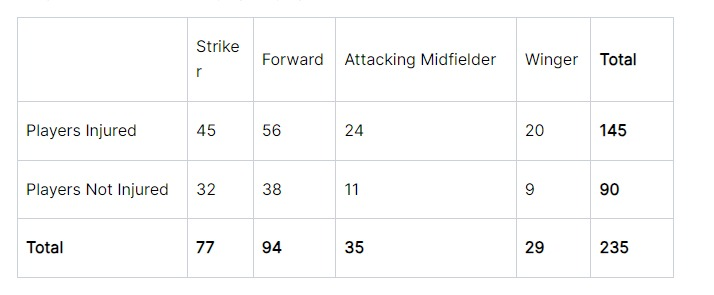

In [4]:
# importing the cross tab image 
Image(filename='D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_2_SMDM/image_file.jpeg',width=500,height=500)

## Analysis

In [5]:
# defining variable
total_players = 235

#### Probability of a randomly chosen player suffering an injury

In [6]:
injured_players = 145
print(f'Probability of a randomly chosen player suffering an injury is {round(injured_players/total_players,4)}')

Probability of a randomly chosen player suffering an injury is 0.617


or there is 61.7% chance that a randomly chosen player will suffer an injury.
#### Probability of a randomly chosen a player being a forward or a winger

In [7]:
forward_players = 94
winger_players = 29
result = (forward_players+winger_players)/total_players
print(f'Probability of a randomly chosen a player being a forward or a winger is {round(result,4)}')

Probability of a randomly chosen a player being a forward or a winger is 0.5234


or there is 52.34% chance that a randomly chosen a player is a forward or a winger.
#### Probability of a randomly chosen player playing in a striker position and has a foot injury

In [8]:
injured_striker = 45
result1 = round(injured_striker/total_players, 4)
print(f'Probability of a randomly chosen player playing in a striker position and has a foot injury is {result1}')

Probability of a randomly chosen player playing in a striker position and has a foot injury is 0.1915


or there is 19.15% chance that a randomly chosen player plays in a striker position and has a foot injury.
#### Probability of a randomly chosen injured player being a striker

In [9]:
result2 = round(injured_striker/injured_players,4)
print(f'Probability of a randomly chosen injured player being a striker is {result2}')

Probability of a randomly chosen injured player being a striker is 0.3103


or there is 31.03% chance that a randomly chosen injured player is a striker.
# Problem 2
## Problem Statement
The objective of this analysis is to help the quality team of a cement company better understand wastage or pilferage within the supply chain by studying the breaking strength of gunny bags used by them for packaging cement.
## Data Description
We know few key points regarding the data:
1. Mean breaking strength of gunny bags is 5 kg per sq. centimeter and a standard deviation is 1.5 kg per sq. centimeter.
2. Data is normally distributed which means that mean, median and mode are approximately equal and data is symmetrically distributed around the mean.

## Analysis

In [10]:
# defining mean and standard deviation
mu = 5
sigma = 1.5

#### Proportion of the gunny bags with breaking strength of less than 3.17 kg per sq cm

In [11]:
test_stat = stats.norm.cdf(3.17, 5, 1.5)
print(f'Proportion of the gunny bags having a breaking strength of less than 3.17 kg per sq cm are {round(test_stat*100,2)}%')

Proportion of the gunny bags having a breaking strength of less than 3.17 kg per sq cm are 11.12%


To understand this result better we will visually represent the data.

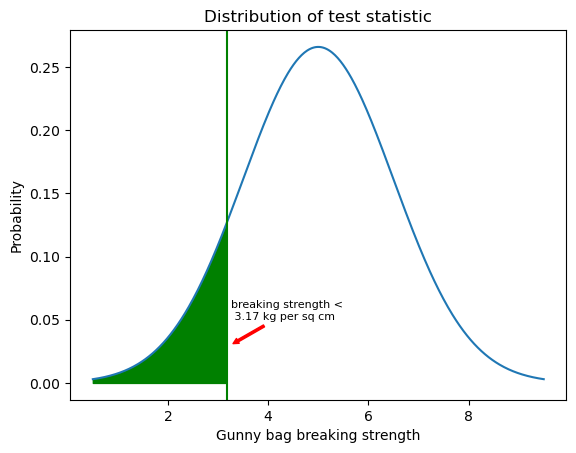

In [12]:
# plotting the distribution
x = np.linspace(mu-sigma*3, mu+sigma*3,500)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
plt.axvline(x = 3.17, c = 'g')
x1 = np.linspace(mu-sigma*3, 3.17,100)
plt.fill_between(x1, stats.norm.pdf(x1,mu,sigma), color = 'g')
plt.annotate('breaking strength <  \n 3.17 kg per sq cm',xy=(3.25,0.03),xytext=(3.25,0.05) , fontsize = 8, 
             arrowprops = {'arrowstyle':'simple','color':'red'})
plt.title('Distribution of test statistic')
plt.xlabel('Gunny bag breaking strength')
plt.ylabel('Probability')
plt.show()

#### Proportion of the gunny bags with a breaking strength of at least 3.6 kg per sq cm.

In [13]:
test_stat = 1 - stats.norm.cdf(3.6, 5, 1.5)
print(f'Proportion of the gunny bags having a breaking strength of at least 3.6 kg per sq cm are {round(test_stat*100,2)}%')

Proportion of the gunny bags having a breaking strength of at least 3.6 kg per sq cm are 82.47%


To understand this result better we will visually represent the data.

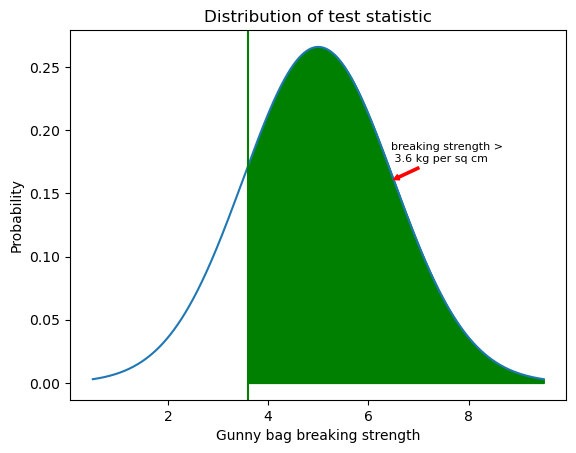

In [14]:
# plotting the distribution
x = np.linspace(mu-sigma*3, mu+sigma*3,500)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
plt.axvline(x = 3.6, c = 'g')
x1 = np.linspace(3.6,mu+sigma*3,100)
plt.fill_between(x1, stats.norm.pdf(x1,mu,sigma), color = 'g')
plt.annotate('breaking strength >  \n 3.6 kg per sq cm',xy=(6.45,0.16),xytext=(6.45,0.175) , fontsize = 8, 
             arrowprops = {'arrowstyle':'simple','color':'red'})
plt.title('Distribution of test statistic')
plt.xlabel('Gunny bag breaking strength')
plt.ylabel('Probability')
plt.show()

#### Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm

In [15]:
test_stat = stats.norm.cdf(5.5, 5, 1.5)-0.5 # deducting 0.5 as cumulative probabilty at mean is 50%
print(f'Proportion of the gunny bags with breaking strength between 5 and 5.5 kg per sq cm are {round(test_stat*100,2)}%')

Proportion of the gunny bags with breaking strength between 5 and 5.5 kg per sq cm are 13.06%


To understand this result better we will visually represent the data.

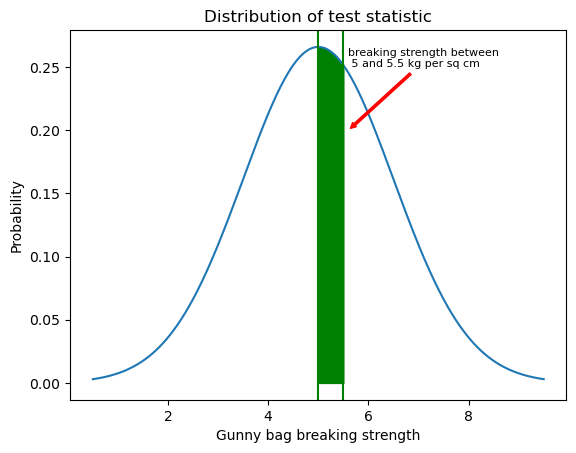

In [16]:
# plotting the distribution
x = np.linspace(mu-sigma*3, mu+sigma*3,500)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
plt.axvline(x = 5.5, c = 'g')
plt.axvline(x = 5, c = 'g')
x1 = np.linspace(5,5.5,30)
plt.fill_between(x1, stats.norm.pdf(x1,mu,sigma), color = 'g')
plt.annotate('breaking strength between  \n 5 and 5.5 kg per sq cm',xy=(5.6,0.2),xytext=(5.6,0.25) , fontsize = 8, 
             arrowprops = {'arrowstyle':'simple','color':'red'})
plt.title('Distribution of test statistic')
plt.xlabel('Gunny bag breaking strength')
plt.ylabel('Probability')
plt.show()

#### Proportion of the gunny bags not having breaking strength between 3 and 7.5 kg per sq cm.

In [17]:
test_stat = stats.norm.cdf(3, 5, 1.5)+(1-stats.norm.cdf(7.5, 5, 1.5))
print(f'Proportion of the gunny bags not having breaking strength between 3 and 7.5 kg per sq cm are {round(test_stat*100,2)}%')

Proportion of the gunny bags not having breaking strength between 3 and 7.5 kg per sq cm are 13.9%


To understand this result better we will visually represent the data.

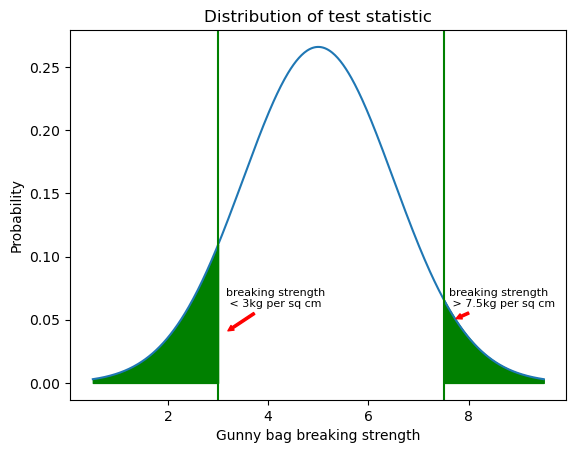

In [18]:
# plotting the distribution
x = np.linspace(mu-sigma*3, mu+sigma*3,500)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
plt.axvline(x = 3, c = 'g')
plt.axvline(x = 7.5, c = 'g')
x1 = np.linspace(mu-sigma*3,3,100)
plt.fill_between(x1, stats.norm.pdf(x1,mu,sigma), color = 'g')
plt.annotate('breaking strength \n < 3kg per sq cm',xy=(3.15,0.04),xytext=(3.15,0.06) , fontsize = 8, 
             arrowprops = {'arrowstyle':'simple','color':'red'})
x2 = np.linspace(7.5,mu+sigma*3,100)
plt.fill_between(x2, stats.norm.pdf(x2,mu,sigma), color = 'g')
plt.annotate('breaking strength \n > 7.5kg per sq cm',xy=(7.7,0.05),xytext=(7.6,0.06) , fontsize = 8, 
             arrowprops = {'arrowstyle':'simple','color':'red'})
plt.title('Distribution of test statistic')
plt.xlabel('Gunny bag breaking strength')
plt.ylabel('Probability')
plt.show()

# Problem 3
## Problem Statement
The objective of this analysis is to study the Brinell's hardness index value of a new batch of polished and unpolished stones received by Zingaro stone printing company.
## Data Description
Dataset includes Brinell's hardness index value for all polished and unpolished stones received in the new batch.
## Dataset Used
Zingaro_Company.csv
## Data Dictionary
* Unpolished: Brinell's hardness index value of unpolished stones in the batch.
* Treated and Polished: Brinell's hardness index value of polished stones in the batch.
## Loading Data

In [19]:
stones_data = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_2_SMDM/Zingaro_Company.csv')

## Data Overview

In [20]:
# Taking a glimpse of the data
stones_data.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


Dataset has 2 columns and expect the datatype for both to be float.

In [71]:
# Information about features of the dataset
stones_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


There are a total of 75 entries in each of the columns with datatype being float as expected. Additionally, there are no missing values in any column. 

In [22]:
#statistical summary of the data
stones_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


* Mean and median values for both columns are approximately similar which means the data is normally distributed which we will confirm later using a distribution plot.
* Mean and median values for both set of stones is lower than the desired minimum value of 150.

### Key observations about dataset
1. Dataset has 2 columns and 75 rows with float datatype and no missing values.
2. Number of polished and unpolished stones recieved in the current batch are equal.
3. Data for polished and unpolished stones are available is seprate columns.
4. Mean and median values are approximately similar, meaning data is normally distributed.
5. Since there are no missing values, bad data and all the data is in desired datatype pre-processing is not required.

## Analysis
### Univariate Analysis

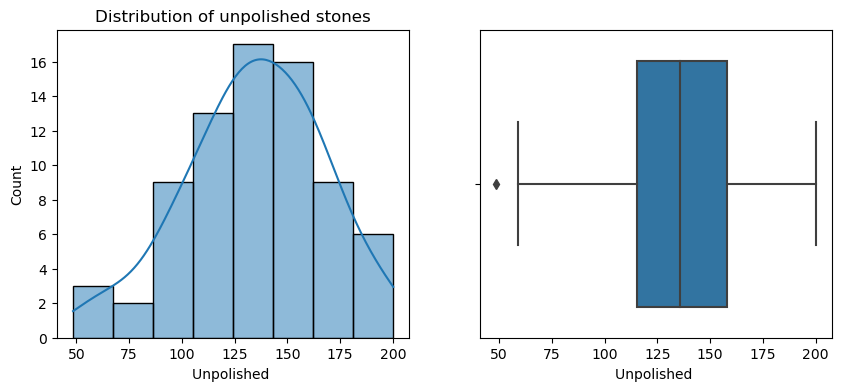

In [23]:
# Plotting to check the distribution of data for unpolished stones
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
sns.histplot(stones_data['Unpolished '], kde=True, ax=axs[0])
sns.boxplot(x='Unpolished ' ,data=stones_data, ax=axs[1])
axs[0].set_title('Distribution of unpolished stones')
plt.show()

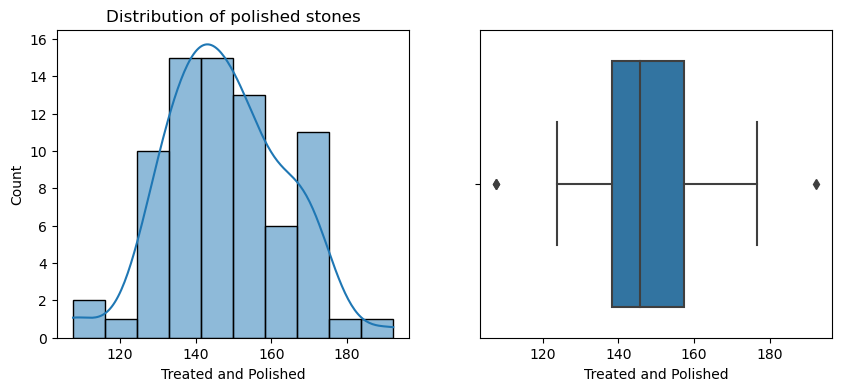

In [24]:
# Plotting to check the distribution of data for polished stones
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
sns.histplot(stones_data['Treated and Polished'], kde=True, ax=axs[0])
sns.boxplot(x='Treated and Polished' ,data=stones_data, ax=axs[1])
axs[0].set_title('Distribution of polished stones')
plt.show()

From the above plots of unpolished and polished stones we can confirm that the data is normally distributed.

### Zingaro has reason to believe that the unpolished stones may not be suitable for printing.
#### Null and alternate hypothesis
#### Null Hypothesis
H0: Unpolished stones are suitable for printing.
#### Alternate Hypothesis
Ha: Unpolished stones are not suitable for printing.
#### level of significance 
alpha = 5% (0.05)
#### Critical Value
Minimum Brinell's hardness index value required for optimum level of printing = 150 

In [25]:
# Defining the variables
alpha = 0.05
critical_level = 150

In [72]:
# performing one sample t-test to examine the hypothesis
t_statistic, p_value = stats.ttest_1samp(stones_data['Unpolished '], critical_level)
print(f't statistic is {t_statistic}')
print(f'p-value is {p_value}')

t statistic is -4.164629601426757
p-value is 8.342573994839304e-05


In [27]:
# comparing p_value with alpha
if p_value < alpha:
    print('Since the p-value is smaller than the level of significance of 0.05 hence we reject the null hypothesis with 95% confidence level.')
else:
    print('Since the p-value is not less than the significance level of 0.05, we cannot reject the null hypothesis.')

Since the p-value is smaller than the level of significance of 0.05 hence we reject the null hypothesis with 95% confidence level.


#### Conclusion
From the above test we can conclude that because the p-value is lower than the 5% significance level, we reject the null hypothesis, indicating with 95% confidence that unpolished stones are unsuitable for printing.
### Mean hardness of the polished and unpolished stones are same
#### Null and alternate hypothesis
#### Null Hypothesis
H0: Mean hardness of the polished and unpolished stones is same.
#### Alternate Hypothesis
Ha: Mean hardness of the polished and unpolished stones is not same.
#### Level of Significance
alpha = 5% (0.05)

In [28]:
# defining the variable
alpha = 0.05

In [73]:
# performing 2 sample t test to compare the mean hardness of polished and unpolished stones
t_stat, p_value = stats.ttest_rel(stones_data['Treated and Polished'], stones_data['Unpolished '])
print(f't-statistic is {t_stat}')
print(f'p-value is {p_value}')

t-statistic is 3.5589113215869057
p-value is 0.0006545976110249849


In [30]:
# comparing p_value with alpha
if p_value < alpha:
    print('Since the p-value is smaller than the level of significance of 0.05 hence we reject the null hypothesis with 95% confidence level.')
else:
    print('Since the p-value is not less than the significance level of 0.05, we cannot reject the null hypothesis.')

Since the p-value is smaller than the level of significance of 0.05 hence we reject the null hypothesis with 95% confidence level.


#### Conclusion 
From the above test we can conclude that because the p-value is lower than the 5% significance level, we reject the null hypothesis, indicating with 95% confidence that mean hardness of the polished and unpolished stones is not same.

# Problem 4
## Problem Statement
The objective is to study the effect of different factors over the hardness of metal implants in dental cavities.
## Data Description
Dataset includes various attributes pertaining to hardness of metal implants and factors affecting it.
## Dataset Used
Dental+Hardness+data.xlsx
## Attributes Information
* Dentist: Dentist who has done the implant.
* Method: Type of method used by dentist.
* Alloy: Type of allow used.
* Temp: Temperature at which the metal is treated.
* Response: Hardness of metal implant.
## Loading Data

In [31]:
dental_implant = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_2_SMDM/Dental+Hardness+data.xlsx')

## Data Overview

In [32]:
# displaying first 5 rows of data
dental_implant.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


Dataset contains Dentist, Method, Alloy, Temprature and Response for each implant in each row.

In [33]:
# checking shape of the dataset
dental_implant.shape

(90, 5)

Dataset has 90 rows and 5 columns

In [34]:
# Checking the data types of the columns for the dataset
dental_implant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


1. There is no null or missing values in the dataset
2. Datatype for all the columns is integer type.
3. Columns Dentist, Method, Alloy and Temp are categorical in nature, we change their data type during pre-processing.

In [35]:
# Statistical summary of data
dental_implant.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


### Key observations about dataset
1. Dataset has 90 rows and 5 columns
2. All the columns have numeric data.
3. Data type for columns Dentist, Method, Alloy and Temp is int64 however the data is categorical in nature so we will change the data type to categorical during pre-processing.
4. There are no missing values and bad data in the dataset.

## Pre-processing Data

In [36]:
# converting datatype to category for categorical factors
dental_implant['Dentist'] = dental_implant['Dentist'].astype('category')
dental_implant['Method'] = dental_implant['Method'].astype('category')
dental_implant['Alloy'] = dental_implant['Alloy'].astype('category')
dental_implant['Temp'] = dental_implant['Temp'].astype('category')

In [37]:
# checking for updated data types
dental_implant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


## Hypothesis Testing
### How does the hardness of implants vary depending on dentists?
#### Null and alternate hypothesis
#### Null hypothesis
H0: Mean hardness of implant remains same across all dentists.
#### Alternate hypothesis
Ha: For atleast one dentist mean hardness of implant varies.
#### Level of significance
For this hypothesis test we will take alpha at 5% (0.05)

Creating seprate dataframes for each alloy

In [38]:
# dataset for alloy 1
alloy1 = dental_implant[dental_implant['Alloy'] == 1].copy().reset_index()
alloy1.drop('index', axis = 1, inplace = True)
alloy1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,2,1,1500,782
4,1,2,1,1600,698


In [74]:
# data overview
alloy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Dentist         45 non-null     category
 1   Method          45 non-null     category
 2   Alloy           45 non-null     category
 3   Temp            45 non-null     category
 4   Response        45 non-null     int64   
 5   Dentist_Method  45 non-null     object  
dtypes: category(4), int64(1), object(1)
memory usage: 1.6+ KB


In [77]:
# statistical summary
alloy1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dentist,45.0,5.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method,45.0,3.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloy,45.0,1.0,1.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,45.0,3.0,1500.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Response,45.0,NaN,NaN,NaN,707.488889,121.194551,289.0,681.0,743.0,782.0,882.0
Dentist_Method,45,15,1:1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# dataset for alloy 2
alloy2 = dental_implant[dental_implant['Alloy'] == 2].copy().reset_index()
alloy2.drop('index', axis = 1, inplace = True)
alloy2.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,2,1500,907
1,1,1,2,1600,792
2,1,1,2,1700,835
3,1,2,2,1500,1115
4,1,2,2,1600,835


In [78]:
# data overview
alloy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     category
 3   Temp      45 non-null     category
 4   Response  45 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.2 KB


In [80]:
# statistical summary
alloy2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dentist,45.0,5.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method,45.0,3.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloy,45.0,1.0,2.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,45.0,3.0,1500.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Response,45.0,NaN,NaN,NaN,776.066667,160.892595,312.0,715.0,824.0,858.0,1115.0


In [40]:
# defining level of significance
alpha = 0.05

#### Analysis for alloy 1

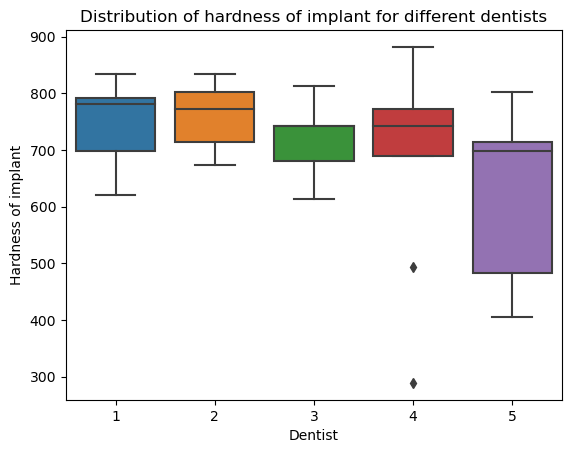

In [41]:
# Visual analysis of hardness of implant for different dentists
sns.boxplot(data = alloy1, x = 'Dentist', y = 'Response')
plt.title('Distribution of hardness of implant for different dentists')
plt.ylabel('Hardness of implant')
plt.show()

Based on the plot above, it's evident that there is some variation in hardness of implant across different dentists. To explore this further, we will conduct ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.
1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilks test
#### Null Hypothesis
H0: Data is normally distributed.
#### Alternate Hypothesis
Ha: Data is not normally distributed.

In [81]:
# performing Shapiro-Wilk's test
w, p_value = stats.shapiro(alloy1['Response'])
print(f'w value is {w}')
print(f'p-value is {p_value}')

w value is 0.8304629921913147
p-value is 1.1945070582441986e-05


Since p-value is significantly smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that data is not normally distributed.  
#### Levene's Test
#### Null Hypothesis
H0: Variance for all dentists is equal
#### Alternate Hypothesis
Ha: Variance for atleast one dentist is not equal

In [83]:
# performing levene's test
statistic, p_value = stats.levene(alloy1['Response'][alloy1['Dentist'] == 1],
                                  alloy1['Response'][alloy1['Dentist'] == 2],
                                  alloy1['Response'][alloy1['Dentist'] == 3],
                                  alloy1['Response'][alloy1['Dentist'] == 4],
                                  alloy1['Response'][alloy1['Dentist'] == 5]
                                 )

print(f'p-value is {round(p_value,4)}')

p-value is 0.2566


Since p-value is significantly greater than the level of significance(0.05), hence we fail to reject the Null Hypothesis(H0).

From the above tests we can conclude that the data does not satisfy all the assumptions of ANOVA test namely data is not normally distributed. However, here we will continue with the ANOVA test.

In [44]:
# performing one way Anova with 'Dentist' with respect to 'Response'
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy1).fit()
aov_table= anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


#### Conclusion
From the above table total sum of squares(SST) is 646277.25 and with Dentist as predictor, (106683.69/646277.25) only 16.5% variability is explained by it. Also p-value of 0.116567 is significantly greater than alpha(0.05). 

Thus to conclude, we fail to reject the Null Hypothesis(H0) that mean hardness of implant remains same across all dentists.


#### Analysis for Alloy2


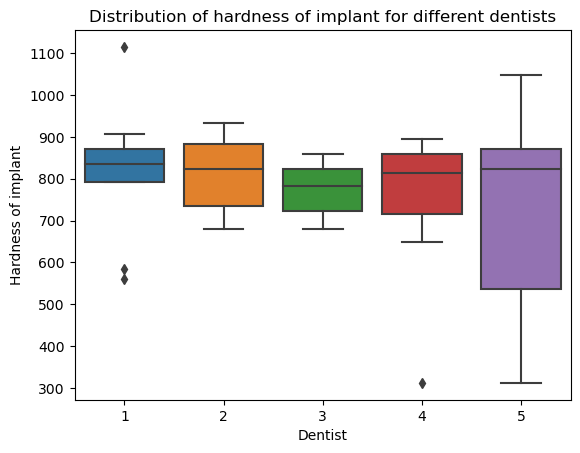

In [45]:
# Visual analysis of hardness of implant for different dentists
sns.boxplot(data = alloy2, x = 'Dentist', y = 'Response')
plt.title('Distribution of hardness of implant for different dentists')
plt.ylabel('Hardness of implant')
plt.show()

Based on the plot above, it's evident that there is some variation in hardness of implant across different dentists. To explore this further, we will conduct ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.

1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilks test
#### Null Hypothesis
H0: Data is normally distributed.

#### Alternate Hypothesis
Ha: Data is not normally distributed.

In [84]:
# performing Shapiro-Wilk's test
w, p_value = stats.shapiro(alloy2['Response'])
print(f'w is {w}')
print(f'p-value is {p_value}')

w is 0.887769341468811
p-value is 0.00040293222991749644


Since p-value is significantly smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that data is not normally distributed.

#### Levene's Test
#### Null Hypothesis
H0: Variance for all dentists is equal

#### Alternate Hypothesis
Ha: Variance for atleast one dentist is not equal

In [47]:
# performing levene's test
statistic, p_value = stats.levene(alloy2['Response'][alloy2['Dentist'] == 1],
                                  alloy2['Response'][alloy2['Dentist'] == 2],
                                  alloy2['Response'][alloy2['Dentist'] == 3],
                                  alloy2['Response'][alloy2['Dentist'] == 4],
                                  alloy2['Response'][alloy2['Dentist'] == 5]
                                 )
print(f'p-value is {round(p_value,4)}')

p-value is 0.2369


Since p-value is significantly greater than the level of significance(0.05), hence we fail to reject the Null Hypothesis(H0).

From the above tests we can conclude that the data does not satisfy all the assumptions of ANOVA test namely data is not normally distributed. However, here we will continue with the ANOVA test.

In [48]:
# performing one way Anova with 'Dentist' with respect to 'Response'
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy2).fit()
aov_table= anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


#### Conclusion
From the above table total sum of squares(SST) is 1139002.91 and with Dentist as predictor, (56797.91/1139002.91) only 4.98% variability is explained by it. Also p-value of 0.718031 is significantly greater than alpha(0.05).

Thus to conclude, we fail to reject the Null Hypothesis(H0) that mean hardness of implant remains same across all dentists.

### How does the hardness of implants vary depending on methods?
#### Null and alternate hypothesis
#### Null hypothesis
H0: Mean hardness of implant remains same across all methods.

#### Alternate hypothesis
Ha: For atleast one method mean hardness of implant varies.

#### Level of significance
For this hypothesis test we will take alpha at 5% (0.05)

In [49]:
# defining alpha
alpha = 0.05

#### Analysis for Alloy 1

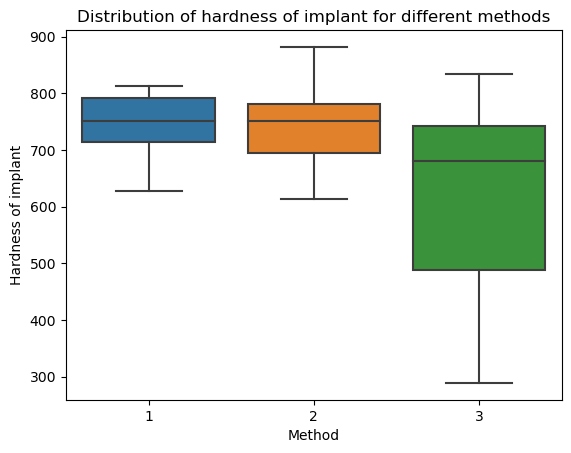

In [50]:
# Visual analysis of hardness of implant for different methods
sns.boxplot(data = alloy1, x = 'Method', y = 'Response')
plt.title('Distribution of hardness of implant for different methods')
plt.ylabel('Hardness of implant')
plt.show()

Based on the above plot, it's evident that there is some variation in hardness of implant across different methods. To explore this further, we will conduct ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.

1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilks test
#### Null Hypothesis
H0: Data is normally distributed.

#### Alternate Hypothesis
Ha: Data is not normally distributed.

In [86]:
w, p_value = stats.shapiro(alloy1['Response'])
print(f'w is{w}')
print(f'p-value is {p_value}')

w is0.8304629921913147
p-value is 1.1945070582441986e-05


Since p-value is significantly smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that data is not normally distributed.

#### Levene's Test
#### Null Hypothesis
H0: Variance for all methods is equal

#### Alternate Hypothesis
Ha: Variance for atleast one method is not equal

In [52]:
# performing levene's test
statistic, p_value = stats.levene(alloy1['Response'][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Method'] == 3])
                                 
print(f'p-value is {round(p_value,4)}')

p-value is 0.0034


Since p-value is significantly smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that  variance for atleast one method is not equal.

From the above tests we can conclude that the data does not satisfy the above stated assumptions of ANOVA test. However, here we will continue with the ANOVA test.

In [53]:
# performing one way Anova with 'Method' with respect to 'Response'
formula = 'Response ~ C(Method)'
model = ols(formula, alloy1).fit()
aov_table= anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


#### Inference
* From the above table total sum of squares(SST) is 646277.25 and with Method as predictor, (148472.18/646277.25) 22.97% variability is explained by it. 

* p-value of 0.004163 is significantly smaller than alpha(0.05).

Thus to conclude, we reject the Null Hypothesis(H0) and with 95% confidence can say that for atleast one method mean hardness of implant varies.

Based on the ANOVA test results, we have determined that the means of at least one group is not equal. To recognize which specific groups differ from one another, we will employ a multiple comparison test.

In [54]:
# porforming tukey hsd test to compare means
pair_table = pairwise_tukeyhsd(endog= alloy1['Response'], groups= alloy1['Method'], alpha = alpha)
print(pair_table)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


Based on the results of tukey test:
* There is no statistically significant difference between Method1 and Method2.
* There are statistically significant differences between Method1 and Method3, as well as between Method2 and Method3.
#### Conclusion
From the above tests we can conclude that:
* With 95% confidence, mean of atleast one method is significantly different from others.
* Method as a predictor explains 22.97% of variability.
* On comparing the means we realised that Method3 shows statistically significant differences from Method1 and Method2.This suggests that the variation observed in the hardness of implant can be attributed to this difference between the Methods.

#### Analysis for Alloy 2

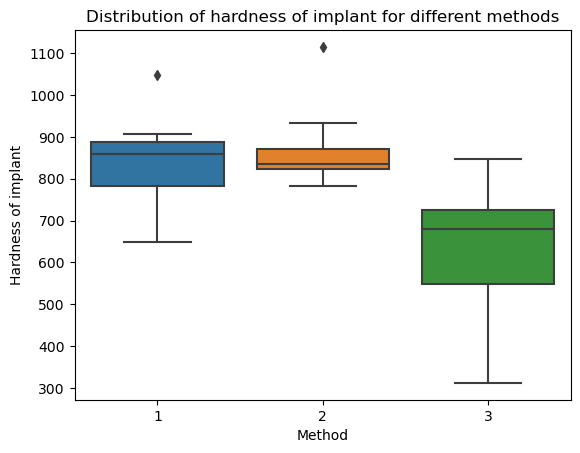

In [55]:
# Visual analysis of hardness of implant for different methods
sns.boxplot(data = alloy2, x = 'Method', y = 'Response')
plt.title('Distribution of hardness of implant for different methods')
plt.ylabel('Hardness of implant')
plt.show()

Based on the above plot, it's evident that there is some variation in hardness of implant across different methods. To explore this further, we will conduct ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.

1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilks test
#### Null Hypothesis
H0: Data is normally distributed.

#### Alternate Hypothesis
Ha: Data is not normally distributed.

In [56]:
w, p_value = stats.shapiro(alloy2['Response'])
print(f'p-value is {p_value}')

p-value is 0.00040293222991749644


Since p-value is significantly smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that data is not normally distributed.

#### Levene's Test
#### Null Hypothesis
H0: Variance for all methods is equal

#### Alternate Hypothesis
Ha: Variance for atleast one method is not equal

In [57]:
# performing levene's test
statistic, p_value = stats.levene(alloy2['Response'][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Method'] == 3])
                                 
print(f'p-value is {round(p_value,4)}')

p-value is 0.0447


Since p-value is smaller than level of significance(0.05), thus we can reject the Null Hypothesis(H0) and with 95% confidence say that variance for atleast one method is not equal.

From the above tests we can conclude that the data does not satisfy the above stated assumptions of ANOVA test. However, here we will continue with the ANOVA test.

In [58]:
# performing one way Anova with 'Method' with respect to 'Response'
formula = 'Response ~ C(Method)'
model = ols(formula, alloy2).fit()
aov_table= anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


#### Inference
* From the above table total sum of squares(SST) is 1139002.8 and with Method as predictor, (499640.4/1139002.8) 43.87% variability is explained by it.

* p-value of 0.000005 is significantly smaller than alpha(0.05).

Thus to conclude, we reject the Null Hypothesis(H0) that mean hardness of implant remains same across all methods with 95% confidence.

Based on the ANOVA test results, we have determined that the means of at least one group is not equal. To recognize which specific groups differ from one another, we will employ a multiple comparison test.

In [59]:
# porforming tukey hsd test to compare means
pair_table = pairwise_tukeyhsd(endog= alloy2['Response'], groups= alloy2['Method'], alpha = alpha)
print(pair_table)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


Based on the results of tukey test:

* There is no statistically significant difference between Method1 and Method2.
* There are statistically significant differences between Method1 and Method3, as well as between Method2 and Method3.
#### Conclusion
From the above tests we can conclude that:

* With 95% confidence, mean of atleast one method is significantly different from others.
* Method as a predictor explains 43.87% of variability.
* On comparing the means we realised that Method3 shows statistically significant differences from Method1 and Method2.This suggests that the variation observed in the hardness of implant can be attributed to this difference between the Methods.

### Interaction effect between the dentist and method on the hardness of dental implants for each type of alloy

We will plot an interaction plot seprately for each of the alloys
#### Interaction plot for Alloy 1

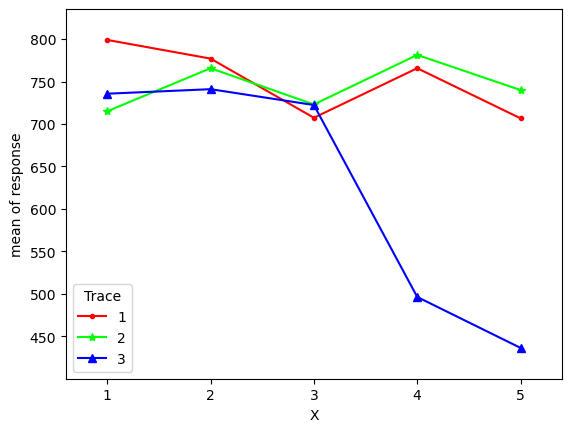

In [60]:
interaction_plot(np.array(alloy1['Dentist']), np.array(alloy1['Method']), np.array(alloy1['Response']), markers = ['.', '*', '^']);

#### Inference
In the above plot all three lines representing different methods interact with each other meaning that dentist and method togeather influence the hardness of implant. 

Mean response values remains within 700 and 800 range for method1 and method2, however, in case of method3 values remain in 700 and 800 range for first 3 dentists but for dentist 4 and 5 there is a steep decline. 
#### Interaction plot for Alloy 2

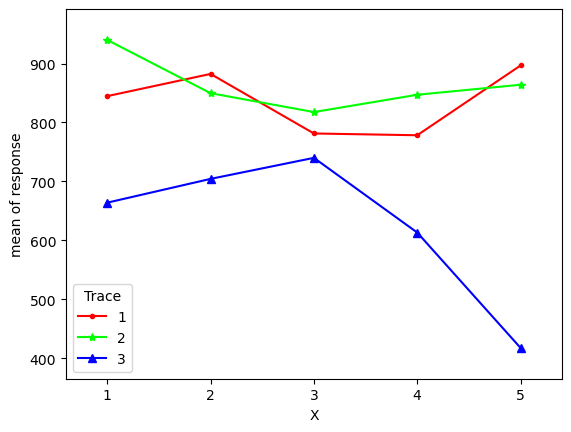

In [61]:
interaction_plot(np.array(alloy2['Dentist']), np.array(alloy2['Method']), np.array(alloy2['Response']), markers = ['.', '*', '^']);

#### Inference
There is some interaction for hardness of dental implant for different dentists based on different methods for Alloy2 meaning that dentist and method could togeather influence the hardness of implant. 

Mean response values remains within 950 and 750 range for method1 and method2, however, in case of method3 values are lower hovering between 650 and 700 first 3 dentists and then there is a steep decline for dentist 4 and 5.

From the above plots we can see that there is some sort of interaction for hardness of dental implant for different dentists based on methods to study this influence we will require to carry out Two way ANOVA test.

### How does the hardness of implants vary depending on dentists and methods together?
Here we will study how dentists and methods interact with each other.
#### Null and alternate hypothesis
#### Null hypothesis
H0: Mean hardness of implant remains same for a dentist irrespective of the method involved. Similarly, mean hardness of implant for a method remains same irrespective of the dentist who performs the implant.

#### Alternate hypothesis
Ha: Mean hardness of implant varies for a dentist depending upon the method involved. Similarly, mean hardness of implant varies for a method depending upon the dentist who performs the implant.

#### Level of significance
For this hypothesis test we will take alpha at 5% (0.05)

In [62]:
# defining level of significance
alpha = 0.05

#### Analysis for Alloy 1

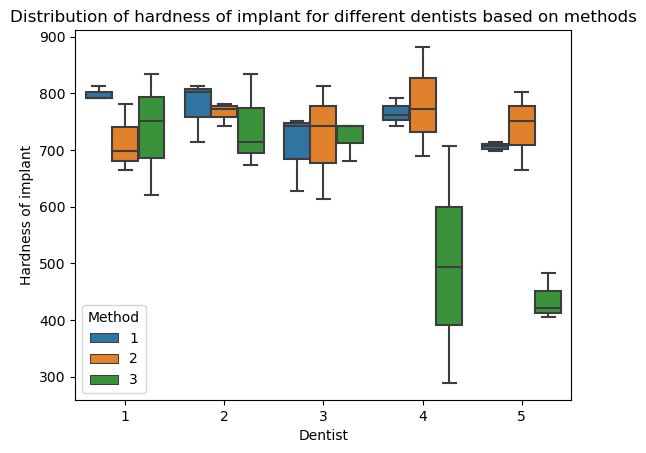

In [63]:
# Visual analysis of hardness of implant for different dentists based on methods
sns.boxplot(data = alloy1, x = 'Dentist', y = 'Response', hue = 'Method')
plt.title('Distribution of hardness of implant for different dentists based on methods')
plt.ylabel('Hardness of implant')
plt.show()

The boxplot shows hardness of implant for different groups of Dentist and Method, range for boxes clearly vary for different groups which means there is some interaction between Dentist and Method which we will test using Two Way ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.

1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilk's Test
We have already done this test earlier when doing One Way ANOVA and found that p-value is significantly smaller than level of significance(0.05), thus we have rejected the Null Hypothesis(H0) and with 95% confidence stated that data is not normally distributed.
#### Levene's Test
#### Null Hypothesis
H0: Variance for all groups are equal

#### Alternate Hypothesis
Ha: Variance for atleast one group is not equal

In [64]:
# performing levene's test
statistic, p_value = stats.levene(alloy1['Response'][alloy1['Dentist']==1][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Dentist']==1][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Dentist']==1][alloy1['Method'] == 3],
                                  alloy1['Response'][alloy1['Dentist']==2][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Dentist']==2][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Dentist']==2][alloy1['Method'] == 3],
                                  alloy1['Response'][alloy1['Dentist']==3][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Dentist']==3][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Dentist']==3][alloy1['Method'] == 3],
                                  alloy1['Response'][alloy1['Dentist']==4][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Dentist']==4][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Dentist']==4][alloy1['Method'] == 3],
                                  alloy1['Response'][alloy1['Dentist']==5][alloy1['Method'] == 1],
                                  alloy1['Response'][alloy1['Dentist']==5][alloy1['Method'] == 2],
                                  alloy1['Response'][alloy1['Dentist']==5][alloy1['Method'] == 3]
                                 )
                                 
print(f'p-value is {round(p_value,4)}')

p-value is 0.3128


Since p-value is significantly greater than the level of significance(0.05), hence we fail to reject the Null Hypothesis(H0).

From the above tests we can conclude that the data does not satisfy all the assumptions of ANOVA test namely data is not normally distributed. However, here we will continue with the Two Way ANOVA test.

In [65]:
# performing Two Way ANOVA Test
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy1).fit()
aov_table= anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


As noted from One Way ANOVA Test, the total sum of squares(SST) is same at 646277.25. With only Dentist as predictor 16.5% variability is explained by it. WIth only Method as predictor 22.97% variability is explained by it. However, when both the predictors are in the model over two third, (441097.25/646277.25) 68.25% variability is explained  by  both main  effects and their interaction  effects.

Also the p-value for all three cases are significantly below the level of significance(0.05).

Thus to conclude, we reject the Null Hypothesis(H0) which sates that mean hardness of implant remains same for a dentist irrespective of the method involved. Similarly, mean hardness of implant for a method remains same irrespective of the dentist who performs the implant.

Based on the ANOVA test results, we have determined that the means of at least one group is not equal. To recognize which specific groups differ from one another, we will employ a multiple comparison test.

In [66]:
# creating a new column in alloy1 df to create groups
alloy1['Dentist_Method'] = alloy1['Dentist'].astype(str) + ':' + alloy1['Method'].astype(str)

In [67]:
# performing tukey hsd test
pair_table = pairwise_tukeyhsd(endog=alloy1['Response'], groups=alloy1['Dentist_Method'], alpha=alpha)
print(pair_table)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1:1    1:2     -84.0 0.9933 -332.8283  164.8283  False
   1:1    1:3  -63.3333 0.9996 -312.1617   185.495  False
   1:1    2:1     -22.0    1.0 -270.8283  226.8283  False
   1:1    2:2  -33.3333    1.0 -282.1617   215.495  False
   1:1    2:3     -58.0 0.9999 -306.8283  190.8283  False
   1:1    3:1  -91.6667 0.9853  -340.495  157.1617  False
   1:1    3:2     -76.0 0.9975 -324.8283  172.8283  False
   1:1    3:3  -76.6667 0.9972  -325.495  172.1617  False
   1:1    4:1  -33.3333    1.0 -282.1617   215.495  False
   1:1    4:2  -17.6667    1.0  -266.495  231.1617  False
   1:1    4:3 -302.6667  0.007  -551.495  -53.8383   True
   1:1    5:1  -92.3333 0.9844 -341.1617   156.495  False
   1:1    5:2     -59.0 0.9998 -307.8283  189.8283  False
   1:1    5:3 -362.6667 0.0007  -611.495 -113.8383   True
   1:2    1:3 

Method 3 used by Dentist 5 has significantly different mean from almost all the methods used by all the dentists. Also, Method 3 used by Dentist 4 is significantly different from Method 1 used by Dentists 1,2 and 4 respectively as well as Method 2 used by Dentist 2 and 4.
#### Conclusion
It is observed that variance in hardness of implant is significantly impacted by both Dentist and Method along with their interaction effect for Alloy1. 

And thus to conclude, with 95% confidence we can say that mean hardness of implant varies for a dentist depending upon the method involved. Similarly, mean hardness of implant varies for a method depending upon the dentist who performs the implant meaning that there is interaction effect between Dentist and Method. 

#### Analysis for Alloy 2

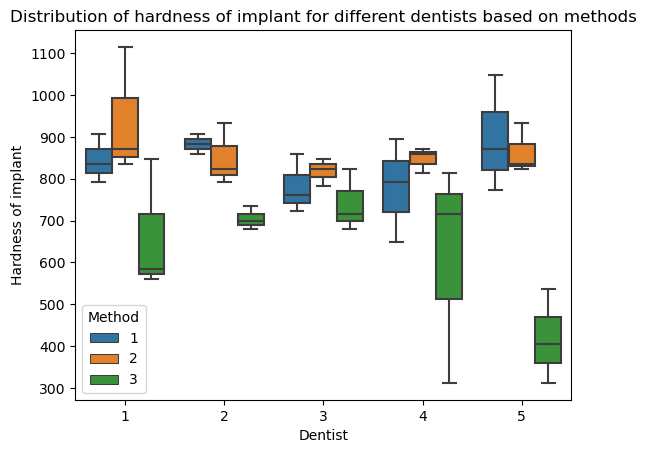

In [68]:
# Visual analysis of hardness of implant for different dentists based on methods
sns.boxplot(data = alloy2, x = 'Dentist', y = 'Response', hue = 'Method')
plt.title('Distribution of hardness of implant for different dentists based on methods')
plt.ylabel('Hardness of implant')
plt.show()

The boxplot shows hardness of implant for different groups of Dentist and Method, range for boxes clearly vary for different groups which means there is some interaction between Dentist and Method which we will test using Two Way ANOVA test.

The ANOVA test relies on certain assumptions that must be met by our data before applying the test.

1. Data has to be normally distributed. We will test using Shapiro-Wilk's test.
2. Population variance is equal for which we will do Levene's test.
3. Samples are randomly and independently drawn.
#### Shapiro-Wilk's Test
We have already done this test earlier when doing One Way ANOVA and found that p-value is significantly smaller than level of significance(0.05), thus we have rejected the Null Hypothesis(H0) and with 95% confidence stated that data is not normally distributed.

#### Levene's Test
#### Null Hypothesis
H0: Variance for all groups are equal

#### Alternate Hypothesis
Ha: Variance for atleast one group is not equal

In [69]:
# performing levene's test
statistic, p_value = stats.levene(alloy2['Response'][alloy2['Dentist']==1][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Dentist']==1][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Dentist']==1][alloy2['Method'] == 3],
                                  alloy2['Response'][alloy2['Dentist']==2][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Dentist']==2][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Dentist']==2][alloy2['Method'] == 3],
                                  alloy2['Response'][alloy2['Dentist']==3][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Dentist']==3][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Dentist']==3][alloy2['Method'] == 3],
                                  alloy2['Response'][alloy2['Dentist']==4][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Dentist']==4][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Dentist']==4][alloy2['Method'] == 3],
                                  alloy2['Response'][alloy2['Dentist']==5][alloy2['Method'] == 1],
                                  alloy2['Response'][alloy2['Dentist']==5][alloy2['Method'] == 2],
                                  alloy2['Response'][alloy2['Dentist']==5][alloy2['Method'] == 3]
                                 )
                                 
print(f'p-value is {round(p_value,4)}')

p-value is 0.7832


Since p-value is significantly greater than the level of significance(0.05), hence we fail to reject the Null Hypothesis(H0).

From the above tests we can conclude that the data does not satisfy all the assumptions of ANOVA test namely data is not normally distributed. However, here we will continue with the Two Way ANOVA test.

In [70]:
# performing Two Way ANOVA Test
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy2).fit()
aov_table= anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


#### Conclusion
As noted from One Way ANOVA Test, the total sum of squares(SST) is same at 1139002.8. With only Dentist as predictor 4.98% variability is explained by it. With only Method as predictor 43.87% variability is explained by it. However, when both the predictors are in the model around two third, (753898.13/1139002.8) 66.19% variability is explained by both main effects and their interaction effects.

The p-value for only Method as predictor is significantly lower than level of significance(0.05) while for Dentist as predictor p-value is significantly higher than level of significance(0.05).

Also, there is no significant interaction effect between Dentist and Method as the p-value for interaction effect is significantly above the level of significance(0.05)

Thus to conclude, we fail to reject the Null Hypothesis(H0) of mean hardness of implant remains same for a dentist irrespective of the method involved. Similarly, mean hardness of implant for a method remains same irrespective of the dentist who performs the implant.

In case of alloy 2, Method as a predictor is the most important factor influencing the Hardness of dental implant, based on the provided results.